In [1]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
# geosptial
import geopandas as gpd
!pip install shapely
!pip install modin[ray]
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

In [5]:
import shapely
print(shapely.__version__)

2.0.6


**Import data and understand it**

In [6]:
df = pd.read_csv('WeatherEvents_Aug16_Dec20_Publish.csv',
     on_bad_lines='skip'
)
print(df.head())

  EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0   W-310  Rain    Light  2016-08-01 00:16:00  2016-08-01 00:56:00   
1   W-311  Rain    Light  2016-08-01 01:16:00  2016-08-01 01:36:00   
2   W-312  Rain    Light  2016-08-01 01:56:00  2016-08-01 02:16:00   
3   W-313  Rain    Light  2016-08-01 02:36:00  2016-08-01 02:56:00   
4   W-314  Rain    Light  2016-08-01 04:36:00  2016-08-01 04:56:00   

      TimeZone  LocationLat  LocationLng AirportCode      City    County  \
0  US/Mountain      38.0972    -106.1689        K04V  Saguache  Saguache   
1  US/Mountain      38.0972    -106.1689        K04V  Saguache  Saguache   
2  US/Mountain      38.0972    -106.1689        K04V  Saguache  Saguache   
3  US/Mountain      38.0972    -106.1689        K04V  Saguache  Saguache   
4  US/Mountain      38.0972    -106.1689        K04V  Saguache  Saguache   

  State  ZipCode  
0    CO  81149.0  
1    CO  81149.0  
2    CO  81149.0  
3    CO  81149.0  
4    CO  81149.0  


In [7]:
df.head(10)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
5,W-315,Rain,Light,2016-08-01 05:16:00,2016-08-01 05:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
6,W-316,Rain,Light,2016-08-01 06:16:00,2016-08-01 06:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
7,W-317,Rain,Light,2016-08-01 23:56:00,2016-08-02 00:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
8,W-318,Rain,Light,2016-08-03 00:16:00,2016-08-03 01:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
9,W-319,Rain,Light,2016-08-03 02:16:00,2016-08-03 02:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576434 entries, 0 to 5576433
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   LocationLat     float64
 7   LocationLng     float64
 8   AirportCode     object 
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 553.1+ MB
None


In [9]:
df.describe()

,LocationLat,LocationLng,ZipCode
count,5.576434e+06,5.576434e+06,5.532804e+06
mean,3.875765e+01,-9.185531e+01,5.236033e+04
std,5.466117e+00,1.344209e+01,2.569405e+04
min,2.455710e+01,-1.245550e+02,1.022000e+03
25%,3.455750e+01,-9.779700e+01,3.109800e+04
50%,3.932000e+01,-8.978690e+01,5.382100e+04
75%,4.301940e+01,-8.189210e+01,7.340100e+04
max,4.894020e+01,-6.779280e+01,9.936200e+04


In [10]:
print(df.nunique())

EventId           5576434
Type                    7
Severity                6
StartTime(UTC)    1472523
EndTime(UTC)      1443909
TimeZone                4
LocationLat          2053
LocationLng          2060
AirportCode          2068
City                 1714
County               1100
State                  48
ZipCode              2017
dtype: int64


In [11]:
print(df.isnull().sum())

EventId               0
Type                  0
Severity              0
StartTime(UTC)        0
EndTime(UTC)          0
TimeZone              0
LocationLat           0
LocationLng           0
AirportCode           0
City              10784
County                0
State                 0
ZipCode           43630
dtype: int64


**Cleaning data**

In [12]:
df.columns = df.columns.str.strip()

In [13]:

df.shape

(5576434, 13)

In [14]:
df= df.dropna()
df.shape

(5532804, 13)

**Explanatory Data Analysis (EDA)**

In [15]:
df['Type'].value_counts()

Type
Rain             3303939
Fog              1243679
Snow              714476
Cold              145961
Precipitation      88982
Storm              33462
Hail                2305
Name: count, dtype: int64

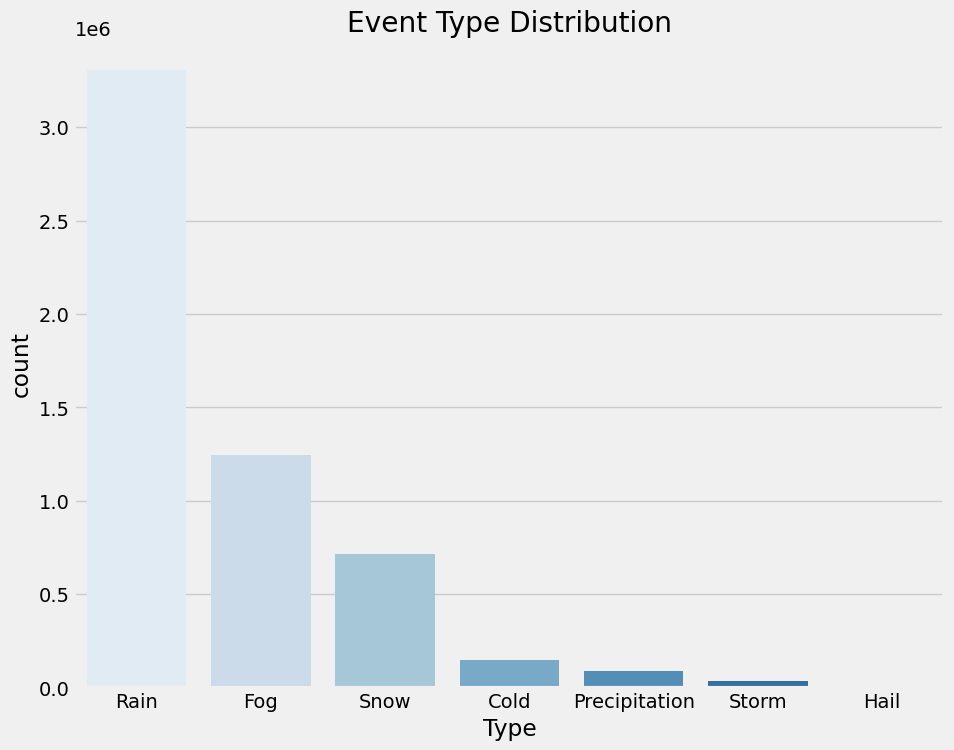

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='Type', data=df, ax=ax, order=df['Type'].value_counts().index, palette="Blues")
ax.set_title('Event Type Distribution')
plt.show()


In [17]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0


In [18]:
TimeZoneUnieaque = df['TimeZone'].unique()
print(TimeZoneUnieaque)

['US/Mountain' 'US/Central' 'US/Eastern' 'US/Pacific']


In [19]:
StateUnieaque = df['State'].unique()
print(StateUnieaque)

['CO' 'OK' 'MN' 'LA' 'WI' 'ID' 'MI' 'KS' 'WY' 'MA' 'MO' 'NM' 'SC' 'NC'
 'RI' 'VA' 'CT' 'OR' 'ND' 'CA' 'NY' 'OH' 'SD' 'AZ' 'NV' 'IA' 'TX' 'GA'
 'NE' 'TN' 'AL' 'IL' 'AR' 'WA' 'IN' 'UT' 'FL' 'WV' 'MS' 'PA' 'ME' 'MD'
 'NJ' 'KY' 'VT' 'MT' 'NH' 'DE']


**Geospatial Data:**

In [20]:
in_shp= r'/content/Data/tl_2024_us_aiannh.shp'

In [22]:
gdf = gpd.read_file('tl_2024_us_state.shp')


print(gdf.head())

  REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS           NAME  \
0      3        5      54  01779805    54  0400000US54     WV  West Virginia   
1      3        5      12  00294478    12  0400000US12     FL        Florida   
2      2        3      17  01779784    17  0400000US17     IL       Illinois   
3      2        4      27  00662849    27  0400000US27     MN      Minnesota   
4      3        5      24  01714934    24  0400000US24     MD       Maryland   

  LSAD  MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0   00  G4000        A   62266513826    488918898  +38.6472854  -080.6183274   
1   00  G4000        A  138965379385  45968913048  +28.3989775  -082.5143005   
2   00  G4000        A  143778206717   6216848695  +40.1028754  -089.1526108   
3   00  G4000        A  206244791203  18937236061  +46.3159573  -094.1996043   
4   00  G4000        A   25151223822   6979843236  +38.9466584  -076.6744939   

                                      

In [23]:
gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266513826,488918898,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138965379385,45968913048,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778206717,6216848695,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244791203,18937236061,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151223822,6979843236,+38.9466584,-076.6744939,"POLYGON ((-75.756 39.24607, -75.75578 39.24334..."


In [24]:
len(gdf)

56

In [25]:
gdf.geom_type

0          Polygon
1     MultiPolygon
2          Polygon
3          Polygon
4          Polygon
5     MultiPolygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13    MultiPolygon
14         Polygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28         Polygon
29         Polygon
30         Polygon
31    MultiPolygon
32         Polygon
33    MultiPolygon
34    MultiPolygon
35    MultiPolygon
36         Polygon
37         Polygon
38    MultiPolygon
39         Polygon
40    MultiPolygon
41    MultiPolygon
42         Polygon
43         Polygon
44         Polygon
45         Polygon
46         Polygon
47         Polygon
48         Polygon
49    MultiPolygon
50         Polygon
51         Polygon
52         P

In [138]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

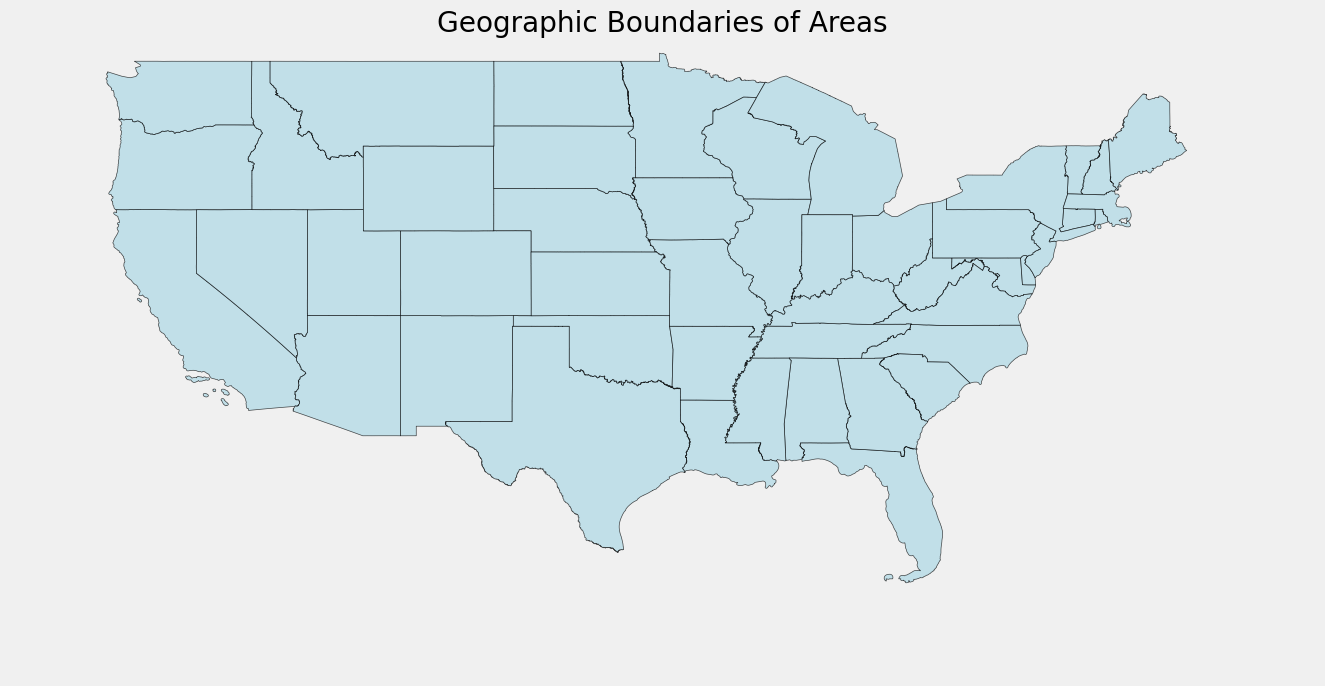

In [26]:
ax=gdf.plot(figsize=(15, 15), alpha=0.7, edgecolor='black', color='lightblue')
ax.set_xlim([-130, -60])
ax.set_ylim([20, 50])
ax.set_axis_off()
plt.title('Geographic Boundaries of Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [28]:
gdf.to_file(r'tl_2024_us_state_op.shp')

In [29]:
#marage the data sets
df['State'] = df['State'].astype(str)
gdf['STUSPS'] = gdf['STUSPS'].astype(str)
print("Unique values in df['State']:", df['State'].unique())
print("Unique values in gdf['STUSPS']:", gdf['STUSPS'].unique())

Unique values in df['State']: ['CO' 'OK' 'MN' 'LA' 'WI' 'ID' 'MI' 'KS' 'WY' 'MA' 'MO' 'NM' 'SC' 'NC'
 'RI' 'VA' 'CT' 'OR' 'ND' 'CA' 'NY' 'OH' 'SD' 'AZ' 'NV' 'IA' 'TX' 'GA'
 'NE' 'TN' 'AL' 'IL' 'AR' 'WA' 'IN' 'UT' 'FL' 'WV' 'MS' 'PA' 'ME' 'MD'
 'NJ' 'KY' 'VT' 'MT' 'NH' 'DE']
Unique values in gdf['STUSPS']: ['WV' 'FL' 'IL' 'MN' 'MD' 'RI' 'ID' 'NH' 'NC' 'VT' 'CT' 'DE' 'NM' 'CA'
 'NJ' 'WI' 'OR' 'NE' 'PA' 'WA' 'LA' 'GA' 'AL' 'UT' 'OH' 'TX' 'CO' 'SC'
 'OK' 'TN' 'WY' 'HI' 'ND' 'KY' 'VI' 'MP' 'GU' 'ME' 'NY' 'NV' 'AK' 'AS'
 'MI' 'AR' 'MS' 'MO' 'MT' 'KS' 'IN' 'PR' 'SD' 'MA' 'VA' 'DC' 'IA' 'AZ']


In [30]:
merged = pd.merge(df, gdf, left_on='State', right_on='STUSPS', how='inner')
print(merged.head())

  EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0   W-310  Rain    Light  2016-08-01 00:16:00  2016-08-01 00:56:00   
1   W-311  Rain    Light  2016-08-01 01:16:00  2016-08-01 01:36:00   
2   W-312  Rain    Light  2016-08-01 01:56:00  2016-08-01 02:16:00   
3   W-313  Rain    Light  2016-08-01 02:36:00  2016-08-01 02:56:00   
4   W-314  Rain    Light  2016-08-01 04:36:00  2016-08-01 04:56:00   

      TimeZone  LocationLat  LocationLng AirportCode      City  ... STUSPS  \
0  US/Mountain      38.0972    -106.1689        K04V  Saguache  ...     CO   
1  US/Mountain      38.0972    -106.1689        K04V  Saguache  ...     CO   
2  US/Mountain      38.0972    -106.1689        K04V  Saguache  ...     CO   
3  US/Mountain      38.0972    -106.1689        K04V  Saguache  ...     CO   
4  US/Mountain      38.0972    -106.1689        K04V  Saguache  ...     CO   

       NAME  LSAD  MTFCC FUNCSTAT         ALAND      AWATER     INTPTLAT  \
0  Colorado    00  G4000        A 

In [31]:
unique_types = merged['Type'].unique()
print(unique_types)
unique_Severity = merged['Severity'].unique()
print(unique_Severity)

['Rain' 'Snow' 'Cold' 'Storm' 'Fog' 'Precipitation' 'Hail']
['Light' 'Moderate' 'Heavy' 'Severe' 'UNK' 'Other']


The DashBoard

In [33]:
weather_data = pd.read_csv('WeatherEvents_Aug16_Dec20_Publish.csv',
     on_bad_lines='skip'
)

map_data = gpd.read_file('tl_2024_us_state.shp')


In [34]:
weather_data['geometry'] = weather_data.apply(
    lambda row: Point(row['LocationLng'], row['LocationLat']), axis=1
)


weather_gdf = gpd.GeoDataFrame(weather_data, geometry='geometry', crs="EPSG:4326")


In [35]:
map_data = map_data.to_crs(epsg=4326)

In [36]:
merged_data = gpd.sjoin(weather_gdf, map_data, how='inner', predicate='within')

In [38]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5576434 entries, 0 to 5576433
Data columns (total 30 columns):
 #   Column          Dtype   
---  ------          -----   
 0   EventId         object  
 1   Type            object  
 2   Severity        object  
 3   StartTime(UTC)  object  
 4   EndTime(UTC)    object  
 5   TimeZone        object  
 6   LocationLat     float64 
 7   LocationLng     float64 
 8   AirportCode     object  
 9   City            object  
 10  County          object  
 11  State           object  
 12  ZipCode         float64 
 13  geometry        geometry
 14  index_right     int64   
 15  REGION          object  
 16  DIVISION        object  
 17  STATEFP         object  
 18  STATENS         object  
 19  GEOID           object  
 20  GEOIDFQ         object  
 21  STUSPS          object  
 22  NAME            object  
 23  LSAD            object  
 24  MTFCC           object  
 25  FUNCSTAT        object  
 26  ALAND           int64   
 27  AWATER   

In [39]:
!pip install dash

In [40]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import geopandas as gpd

# Initialize Dash application
app = dash.Dash(__name__)

# Convert the 'StartTime(UTC)' column to datetime
merged_data['StartTime(UTC)'] = pd.to_datetime(merged_data['StartTime(UTC)'], errors='coerce')

# Remove rows with missing dates
merged_data = merged_data.dropna(subset=['StartTime(UTC)'])

# List of available weather types
weather_types = ['Rain', 'Snow', 'Cold', 'Storm', 'Fog', 'Precipitation', 'Hail', 'All Weather Types']

# Set up color mapping for weather types
weather_type_colors = {
    'Rain': 'blue',
    'Snow': 'red',
    'Cold': 'purple',
    'Storm': 'yellow',
    'Fog': 'orange',
    'Precipitation': 'green',
    'Hail': 'pink',
    'All Weather Types': 'gray'
}

# sorted list of dates
available_dates = sorted(merged_data['StartTime(UTC)'].dt.strftime('%Y-%m-%d').unique(), reverse=True)

# Define user interface layout
app.layout = html.Div([
    html.H1("Weather Events in the United States"),

    # Weather type dropdown
    dcc.Dropdown(
        id='weather_type_dropdown',
        options=[{'label': weather, 'value': weather} for weather in weather_types],
        value='All Weather Types',
        multi=False,
        placeholder="Select Weather Type"
    ),

    # Date dropdown
    dcc.Dropdown(
        id='date_dropdown',
        options=[{'label': date, 'value': date} for date in available_dates],
        value=available_dates[0],
        multi=False,
        placeholder="Select Date"
    ),

    # Map to display weather events
    dcc.Graph(id='weather_map'),

    # Bar chart for weather cases
    dcc.Graph(id='weather_cases_bar_chart')
])

# Update the map based on user selections
@app.callback(
    dash.Output('weather_map', 'figure'),
    [dash.Input('date_dropdown', 'value'),
     dash.Input('weather_type_dropdown', 'value')]
)
def update_weather_map(selected_date, selected_weather):
    # Filter data by selected date
    filtered_data = merged_data[merged_data['StartTime(UTC)'].dt.strftime('%Y-%m-%d') == selected_date]

    if selected_weather != 'All Weather Types':
        # Filter data by selected weather type
        filtered_data = filtered_data[filtered_data['Type'] == selected_weather]

    # Check if the filtered data is empty
    if filtered_data.empty:
        return {
            'data': [],
            'layout': {
                'title': f'No data available for {selected_weather} on {selected_date}'
            }
        }

    # Create a scatter geo map using Plotly
    fig = px.scatter_geo(
        filtered_data,
        lon=filtered_data['LocationLng'],
        lat=filtered_data['LocationLat'],
        color='Type',
        color_discrete_map=weather_type_colors,
        hover_name='State',
        hover_data=['City', 'County', 'Type'],
        title=f'Weather Events: {selected_weather} on {selected_date}'
    )

    # Customize map layout
    fig.update_layout(
        geo=dict(
            visible=True,
            lakecolor='white',
            projection_scale=2.5,
            showland=True,
            landcolor='lightgray',
            showcountries=True,
            countrycolor='black',
            center={"lat": 37.090, "lon": -95.712}
        ),
        margin={"r": 0, "t": 0, "l": 0, "b": 0},
        legend_title="Weather Type"
    )

    return fig

# bar chart for weather cases
@app.callback(
    dash.Output('weather_cases_bar_chart', 'figure'),
    [dash.Input('date_dropdown', 'value'),
     dash.Input('weather_type_dropdown', 'value')]
)
def update_weather_cases_bar_chart(selected_date, selected_weather):
    # Filter data by selected date
    filtered_data = merged_data[merged_data['StartTime(UTC)'].dt.strftime('%Y-%m-%d') == selected_date]

    if selected_weather != 'All Weather Types':
        # Filter data by selected weather type
        filtered_data = filtered_data[filtered_data['Type'] == selected_weather]

    # Group data by state and weather type
    state_weather_counts = filtered_data.groupby(['State', 'Type']).size().reset_index(name='Count')

    # Create a stacked bar chart using Plotly
    fig = px.bar(
        state_weather_counts,
        x='State',
        y='Count',
        color='Type',
        color_discrete_map=weather_type_colors,
        title=f'Weather Events by State for {selected_weather} on {selected_date}',
        labels={'Count': 'Number of Events', 'State': 'State'}
    )

    # Customize bar chart layout
    fig.update_layout(
        xaxis_title='State',
        yaxis_title='Number of Events',
        barmode='stack',
        coloraxis_showscale=False
    )

    return fig

# Run the Dash application
if __name__ == '__main__':
    app.run_server(debug=True)
